# Model Training

In [1]:
import time
import datetime

import numpy as np
from matplotlib import pyplot as plt
import torch
import torchvision.transforms.functional as F

from dataset import load_filtered_train_test_split
from utils import show_result
from train import train

from models.UNet import UNet
from models.ViT_UNet import ViT_UNet
from models.UNETR import UNETR

### Load Train and Test Dataset Objects

Loading filtered 2D segmentation dataset...
MRI shape torch.Size([3, 256, 256])
Mask shape torch.Size([1, 256, 256])


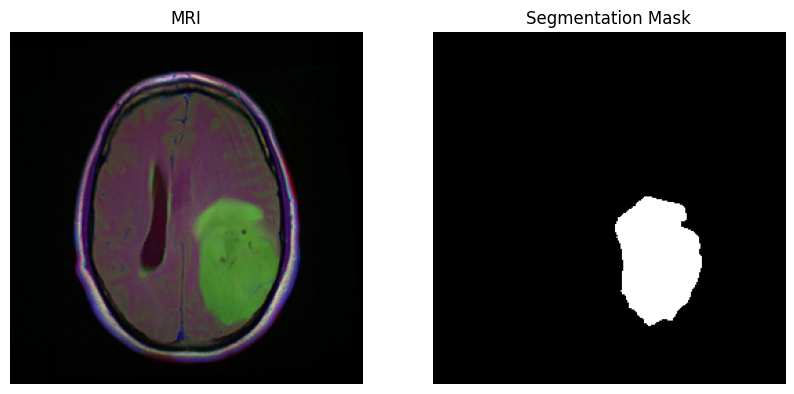

In [2]:
train_dataset, test_dataset = load_filtered_train_test_split()

X = test_dataset[26][0]
Y = test_dataset[26][1]
print('MRI shape', X.shape)
print('Mask shape',Y.shape)

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(F.to_pil_image(X))
plt.title('MRI')
plt.axis('off')

plt.subplot(122)
plt.imshow(F.to_pil_image(Y), cmap='gray')
plt.title('Segmentation Mask')
plt.axis('off')

plt.show()

# Select Model

In [3]:
net = UNet()
# net = ViT_UNet()
# net = UNETR()


In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

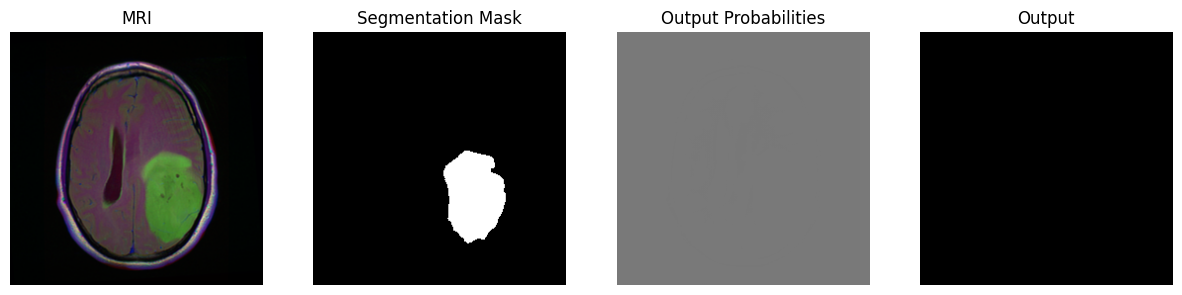

In [4]:
net.eval()
y_prob = net(X.unsqueeze(0)).squeeze().detach()
show_result(X, Y, y_prob)

Epoch: 0 Loss: 1.0
Epoch: 1 Loss: 1.0
Epoch: 2 Loss: 1.0
Training took 00h 00m 05s


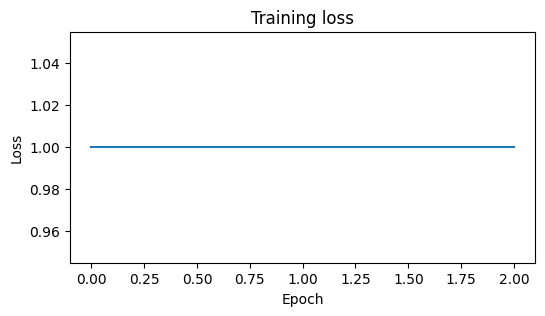

In [ ]:
num_epoch = 250
batch_size = 32
optimizer=torch.optim.SGD(net.parameters(), lr=0.5, momentum=0.9)

start_time = time.time()

loss_graph, iterations = train(net,
                               train_dataset,
                               num_epoch,
                               device,
                               batch_size=batch_size)

end_time = time.time()
duration = time.strftime("%Hh %Mm %Ss", time.gmtime(end_time-start_time))
print(f'Training took {duration}')

plt.figure(figsize=(6, 3))
plt.plot(np.arange(0, iterations), loss_graph)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss')
plt.show()

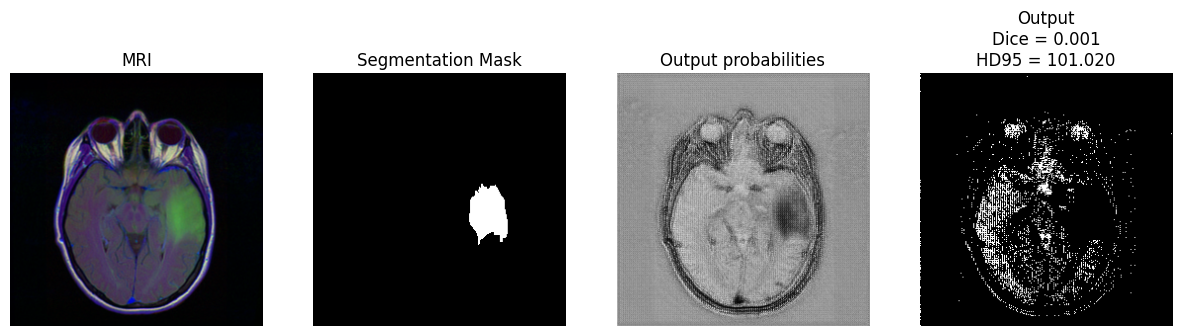

In [15]:
net.eval()
y_prob = net(X.unsqueeze(0)).squeeze().detach()
show_result(X, Y, y_prob, include_dice=True, include_hd95=True)

In [16]:
# Save the model
curr_time = datetime.datetime.now().strftime('%d%m%Y_%H%M')
filepath = f'models/gpu_{net.__class__.__name__}_{curr_time}'
torch.save(net, filepath)